<a href="https://colab.research.google.com/github/phanmanhtung/Machine-Learning-and-Data-Mining-2/blob/master/Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ggcolab/'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
column = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df = pd.read_csv("/content/gdrive/My Drive/iris.data", sep=',', header=None)
df.columns = column
myclass = df["class"]
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
type(df["sepal length"][0])

numpy.float64

Text(0, 0.5, 'petal width')

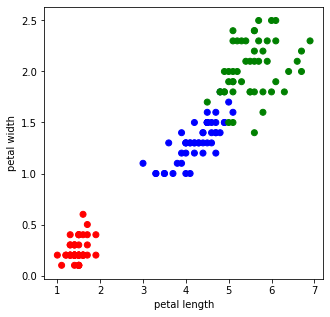

In [0]:
plt.figure(figsize=(5, 5))
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
plt.scatter(df[df.columns[2]], df[df.columns[3]], c=df["class"].apply(lambda x: colors[x]))
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])

# Change 0-1-2

In [0]:
df.mean()

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

In [0]:
df.var()

sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

In [0]:
df.cov()

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [0]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [0]:
stringlist = []
for i in range(0,150):
  i = "-" + str(i)
  stringlist.append(i)
newcolumns = np.array([i + j for i, j in zip(df["class"].values, stringlist)])

# Preprocess data for PCA
df.index = newcolumns
df.drop(['class'], axis=1, inplace=True)
df.head()

,sepal length,sepal width,petal length,petal width
Iris-setosa-0,5.1,3.5,1.4,0.2
Iris-setosa-1,4.9,3.0,1.4,0.2
Iris-setosa-2,4.7,3.2,1.3,0.2
Iris-setosa-3,4.6,3.1,1.5,0.2
Iris-setosa-4,5.0,3.6,1.4,0.2


In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_data = preprocessing.scale(df)
 
pca = PCA(n_components=2) # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

In [0]:
print(scaled_data.shape)
print(pca_data.shape)

(150, 4)
(150, 2)


[72.8 23. ]


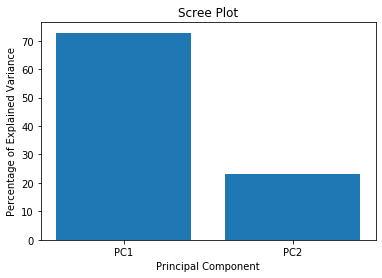

In [0]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

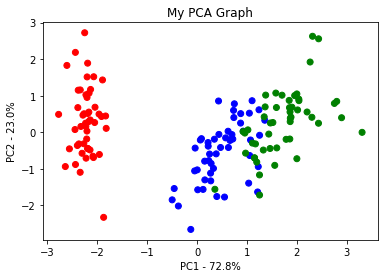

In [0]:
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df['class'] = myclass

colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}

plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df['class'].apply(lambda x: colors[x]))
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_data = preprocessing.scale(df)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

[72.8 23.   3.7  0.5]


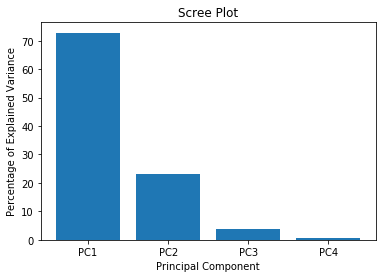

In [0]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

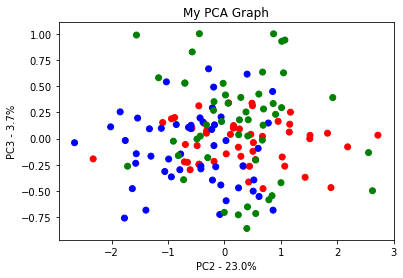

In [0]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df['class'] = myclass

colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}

plt.scatter(pca_df.PC2, pca_df.PC3, c=pca_df['class'].apply(lambda x: colors[x]))
plt.title('My PCA Graph')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))
plt.show()

In [0]:
# Breast cancer dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
          "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
df = pd.read_csv("/content/gdrive/My Drive/breast-cancer-wisconsin.data", sep=',', header=None, skipinitialspace=True)
df.columns = column

# Save the class information
myclass = df["Class"]

# Set the ID number as index
df.set_index("Sample code number", inplace=True)

# Get rid of class column for statistical analysis and PCA, append it latter
df.drop(['Class'],axis=1, inplace=True)

df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Sample code number,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1
1002945,5,4,4,5,7,10,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,8,8,1,3,4,3,7,1
1017023,4,1,1,3,2,1,3,1,1


In [0]:
df.mean()

Clump Thickness                4.417740
Uniformity of Cell Size        3.134478
Uniformity of Cell Shape       3.207439
Marginal Adhesion              2.806867
Single Epithelial Cell Size    3.216023
Bland Chromatin                3.437768
Normal Nucleoli                2.866953
Mitoses                        1.589413
dtype: float64

In [0]:
df.var()

Clump Thickness                7.928395
Uniformity of Cell Size        9.311403
Uniformity of Cell Shape       8.832265
Marginal Adhesion              8.153191
Single Epithelial Cell Size    4.903124
Bland Chromatin                5.945620
Normal Nucleoli                9.324680
Mitoses                        2.941492
dtype: float64

In [0]:
df.cov()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,7.928395,5.541164,5.477690,3.910308,3.253469,3.834057,4.607235,1.690389
Uniformity of Cell Size,5.541164,9.311403,8.224213,6.147786,5.079791,5.622994,6.735683,2.400566
Uniformity of Cell Shape,5.477690,8.224213,8.832265,5.796568,4.735926,5.333128,6.529071,2.237156
Marginal Adhesion,3.910308,6.147786,5.796568,8.153191,3.791065,4.641975,5.260800,2.045230
Single Epithelial Cell Size,3.253469,5.079791,4.735926,3.791065,4.903124,3.326500,4.252278,1.819482
Bland Chromatin,3.834057,5.622994,5.333128,4.641975,3.326500,5.945620,4.958041,1.439312
Normal Nucleoli,4.607235,6.735683,6.529071,5.260800,4.252278,4.958041,9.324680,2.243289
Mitoses,1.690389,2.400566,2.237156,2.045230,1.819482,1.439312,2.243289,2.941492


In [0]:
df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000


In [0]:
df.corr().replace(1, -1).max().max()

0.9068819130526037

(699, 9)
(699, 2)
[65.4  8.6]


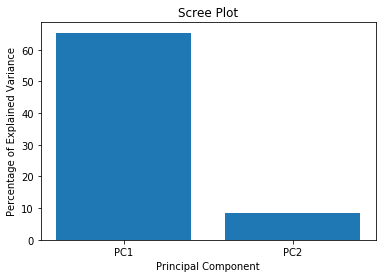

In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Fill unknown value with 1
df.replace("?", 1, inplace=True)

scaled_data = preprocessing.scale(df)
 
pca = PCA(n_components=2) # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

print(scaled_data.shape)
print(pca_data.shape)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

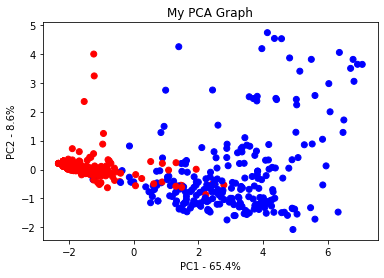

In [0]:
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df['Class'] = myclass

colors = {2:'red', 4:'blue'}

plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df['Class'].apply(lambda x: colors[x]))
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

[65.4  8.6  6.   5.2]


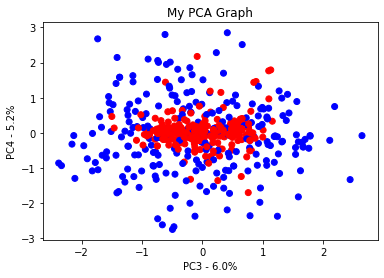

In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Fill unknown value with 1
df.replace("?", 1, inplace=True)

scaled_data = preprocessing.scale(df)
 
pca = PCA(n_components=4) # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df['Class'] = myclass

colors = {2:'red', 4:'blue'}

plt.scatter(pca_df.PC3, pca_df.PC4, c=pca_df['Class'].apply(lambda x: colors[x]))
plt.title('My PCA Graph')
plt.xlabel('PC3 - {0}%'.format(per_var[2]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))
plt.show()

In [0]:
myclass

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64